# 8INF867 : Fondamentaux de l’Apprentissage Automatique (AA) Devoir #4

### ANALYSE COMPARATIVE D’ALGORITHMES

Travail réalisé par LEGRIX Jérémy et ALBRECHT Elise sur le Reinforcement Learning

In [1]:
from MazeEnv import MazeEnv as Maze_env
from ReinforcementLearning import train_q_learning, show_final_solution, train_sarsa, plotting_rewards, show_final_state
import time
import pygame

Les fichiers MazeEnv.py et ReinforcementLearning.py ont été codés par nous-même pour mettre en place l'environnement du labyrinthe et les algorithmes de renforcement. Ceux testés sont Q-learning et SARSA.

Le fichier Main.py peut également être utilisé pour faire tourner notre programme en choisissant l'algorithme à tester. Ce notebook a pour objectif de montrer les résultats des tests effectués sur les algorithmes Q-learning et SARSA.

In [2]:
env = Maze_env()

Création de l'environnement du labyrinthe

## Q-learning

Entraînement Q-learning en cours...


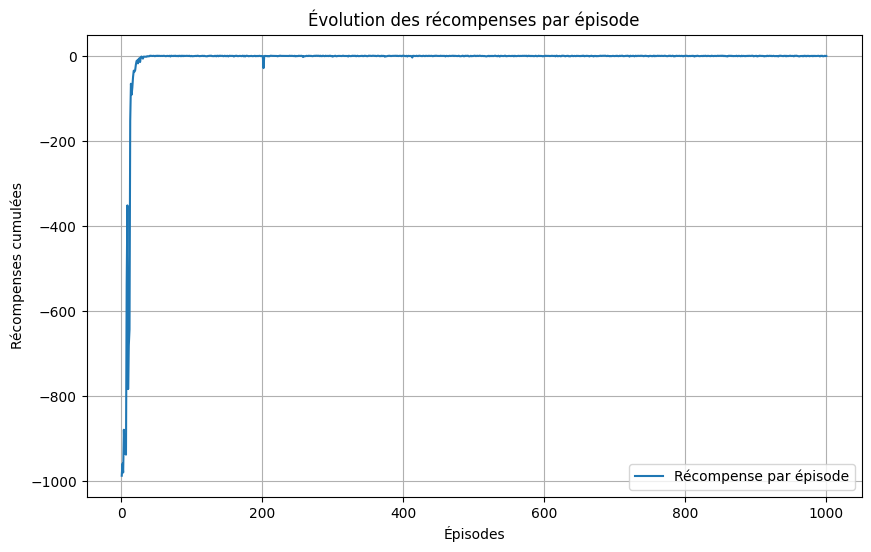

In [3]:
%matplotlib inline
q_table_q, rewards_list_q = train_q_learning(env, show_training=False)
plotting_rewards(rewards_list_q)


In [4]:
print(max(rewards_list_q[5:]))
print(min(rewards_list_q[5:]))

1.0793340192014858
-938.1709392025375


Ce graphique montre l'évolution des récompenses cumulées au cours des épisodes pour l'algorithme Q-learning. On peut voir que les récompenses des premiers épisodes sont très faibles, mais elles augmentent rapidement pour atteindre un plateau. Cela signifie que l'agent apprend à résoudre le labyrinthe.

Les pics négatifs proviennent d'un hyperparamètre epsilon, qui fait que l'agent fait des actions aléatoires avec certaines probabilités. Cela peut le faire partir dans une mauvaise direction, mais il apprendra de ses erreurs et cela permet une meilleure exploration de l'environnement. C'est certainement grâce à cela que l'agent a pu trouver le chemin le plus court pour atteindre l'objectif

## SARSA

Entraînement SARSA en cours...


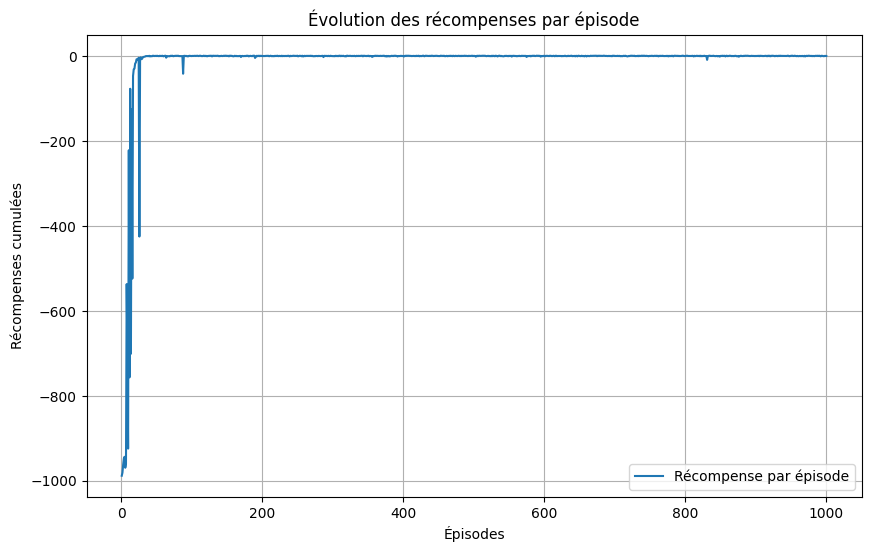

In [5]:
q_table_sarsa, rewards_list_sarsa = train_sarsa(env, show_training=False)
plotting_rewards(rewards_list_sarsa)

In [6]:
print(max(rewards_list_sarsa[5:]))
print(min(rewards_list_sarsa[5:]))

1.0793340192014858
-969.1823648181196


L'algorithme SARSA obtient des résultats similaires à Q-learning, mais il semble prendre plus de temps à converger. Cela peut être dû à la manière dont SARSA met à jour la Q-Table. Il prend en compte la prochaine action de l'agent pour mettre à jour la valeur de la Q-Table, ce qui peut lui permettre de prendre plus de temps pour trouver. Il va en revanche être plus prudent et pourrait trouver une meilleure solution que Q-learning dans des cas plus complexes

## Comparaison des hyperparamètres

In [7]:
def change_hyperparameters(learning_type):
    alphas = [0.01, 0.05, 0.1]
    gammas = [0.9, 0.95]
    epsilons = [0.1, 0.2]
    episodes = [50, 100, 500]

    best_rewards = []
    worst_rewards = []

    # Variables pour suivre le meilleur entraînement
    best_overall_reward = float(-500)  # Initialise avec la valeur la plus basse possible
    best_parameters = None
    best_q_table = None

    start_time = time.time()

    for alpha in alphas:
        for gamma in gammas:
            for epsilon in epsilons:
                for episode in episodes:
                    if learning_type == 'Q':
                        q_table, rewards_list = train_q_learning(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episode, show_training=False)
                    elif learning_type == 'SARSA':
                        q_table, rewards_list = train_sarsa(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episode, show_training=False)
                    else:
                        print("Invalid learning type")
                        break

                    # Sauvegarder les récompenses
                    current_best_reward = max(rewards_list[5:])
                    current_worst_reward = min(rewards_list[5:])
                    best_rewards.append(current_best_reward)
                    worst_rewards.append(current_worst_reward)

                    # Mettre à jour les meilleurs paramètres
                    if current_best_reward > best_overall_reward:
                        best_overall_reward = current_best_reward
                        best_parameters = {
                            'alpha': alpha,
                            'gamma': gamma,
                            'epsilon': epsilon,
                            'episodes': episode,
                            'reward': best_overall_reward
                        }
                        best_q_table = q_table

    total_time = time.time() - start_time
    print(f"Total time: {total_time}")
    print(f"Best parameters: {best_parameters}")

    return best_rewards, worst_rewards, best_parameters, best_q_table

Nous avons testé plusieurs combinaisons d'hyperparamètres pour les algorithmes Q-learning et SARSA. La fonction s'apparente à une recherche en grille, où nous avons testé différentes valeurs pour alpha, gamma, epsilon et le nombre d'épisodes.

On récupère les meilleures et les pires récompenses pour chaque combinaison d'hyperparamètres. On garde également en mémoire les meilleurs paramètres pour chaque algorithme

In [8]:
best_rewards_q, worst_rewards_q, best_parameters_q, best_q_table_q = change_hyperparameters('Q')

Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en cours...
Entraînement Q-learning en c

In [9]:
best_rewards_sarsa, worst_rewards_sarsa, best_parameters_sarsa, best_q_table_sarsa = change_hyperparameters('SARSA')

Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraînement SARSA en cours...
Entraîne

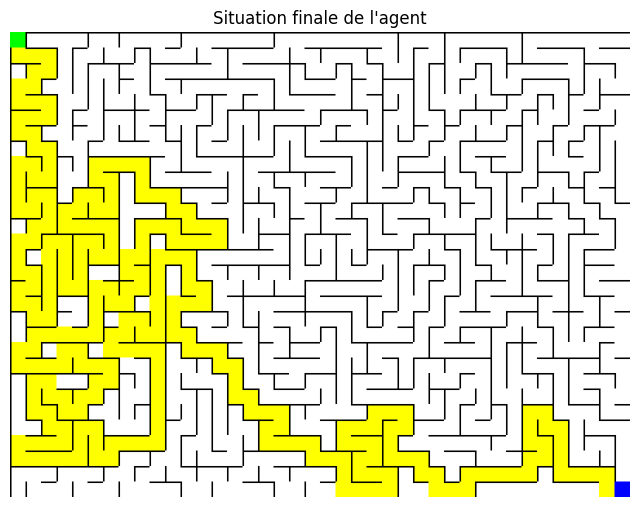

In [10]:
show_final_solution(env, best_q_table_q, "q") # Affiche le chemin final trouvé par Q-learning dans l'interface graphique
show_final_state("q")

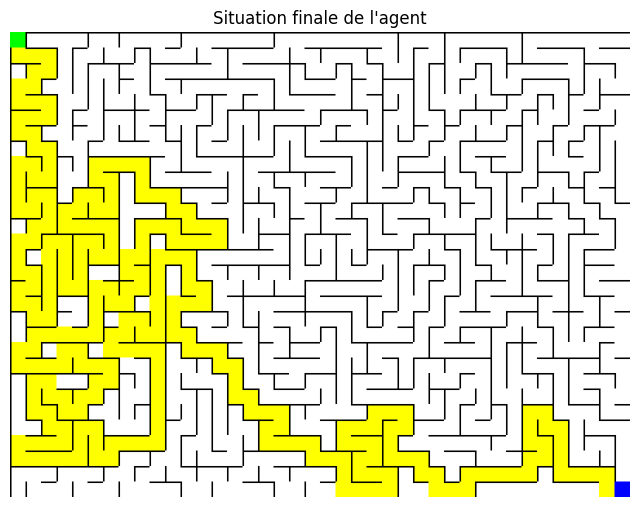

In [11]:
show_final_solution(env, best_q_table_sarsa, "sarsa")
show_final_state("sarsa")

On peut voir que les deux algorithmes trouvent tous les 2 le chemin pour atteindre l'objectif (toujours situé tout en bas à droite du labyrinthe)

In [12]:
env.close()
pygame.display.quit()

## Conclusion

Les algorithmes Q-learning et SARSA sont deux méthodes efficaces d'apprentissage par renforcement pour résoudre des problèmes de labyrinthe. 

### Q-learning
- **Avantages** : Apprentissage rapide, exploration agressive de l'environnement.
- **Inconvénients** : Peut prendre des chemins plus risqués, dépend fortement des hyperparamètres.

### SARSA
- **Avantages** : Apprentissage plus prudent, prend en compte la prochaine action pour mettre à jour la Q-Table.
- **Inconvénients** : Peut être plus lent à converger, mais trouve des solutions plus sûres.

### Comparaison des hyperparamètres
- Une recherche en grille a permis de tester différentes combinaisons d'hyperparamètres pour optimiser les performances des deux algorithmes.
- Les meilleurs paramètres ont été identifiés pour chaque algorithme, permettant d'obtenir des récompenses maximales.

### Résultats
- Les deux algorithmes ont trouvé le chemin le plus court pour atteindre l'objectif.
- Q-learning a tendance à être plus rapide mais moins prudent.
- SARSA est plus prudent mais peut prendre plus de temps pour atteindre l'objectif.

En conclusion, le choix entre Q-learning et SARSA dépend des priorités de l'application : rapidité d'apprentissage ou sécurité et prudence dans les décisions. Les deux algorithmes ont montré leur efficacité dans l'environnement de labyrinthe testé.